In [134]:
import matplotlib.pyplot as plt
from collections import OrderedDict
import re


def find_first_appear_number(s):
    num = 0
    for i, c in enumerate(s):
        if c.isdigit():
            num = num * 10 + int(c)
        else:
            if num == 0:
                continue
            else:
                break
    return num


def read_loss_file(file_path, mode='train'):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    info = OrderedDict()
    for i, line in enumerate(lines):
        if line.find("val") != -1 and mode == 'train':
            continue
        if line.find("val") == -1 and mode == 'val':
            continue
        line = line.replace(" ", "")
        if line.find("val") == -1:
            epoch_pattern = re.compile(r'(?:train:)\d+\.?\d*')
            # print(epoch_pattern.findall(line))
            epoch = int(epoch_pattern.findall(line)[0][6:])
        else:
            epoch_pattern = re.compile(r'(?:val:)\d+\.?\d*')
            epoch = int(epoch_pattern.findall(line)[0][4:])
        loss_pattern = re.compile(r'(?:Loss/total:)\d+\.?\d*')
        loss = float(loss_pattern.findall(line)[0][11:])
        iou_pattern = re.compile(r'(?:IoU:)\d+\.?\d*')
        iou = float(iou_pattern.findall(line)[0][4:])
        # print(line)
        # print(epoch)
        # print(loss)
        # print(iou)

        if epoch in info.keys():
            info[epoch].append((loss, iou))
        else:
            info[epoch] = [(loss, iou)]
    return info

iou_list:  [0.7947925000000001, 0.7976356250000002, 0.7984246875000001, 0.7991474999999999, 0.8003540625000002, 0.792695625, 0.796755625, 0.8001046875, 0.7926734374999999, 0.796536875, 0.8040356249999999, 0.7972971875, 0.8026153125000002, 0.79978375, 0.7891524999999999, 0.7972118749999998, 0.7899828125, 0.7954715624999998, 0.8020615624999999, 0.7913506250000002, 0.7893662499999999, 0.7900784375000002, 0.7724378124999999, 0.7851178124999999, 0.7900712499999998, 0.7928887499999998, 0.7913462500000001, 0.7952612500000001, 0.7936028125, 0.7917434375000001]
best epoch: 11, max iou: 0.8040356249999999


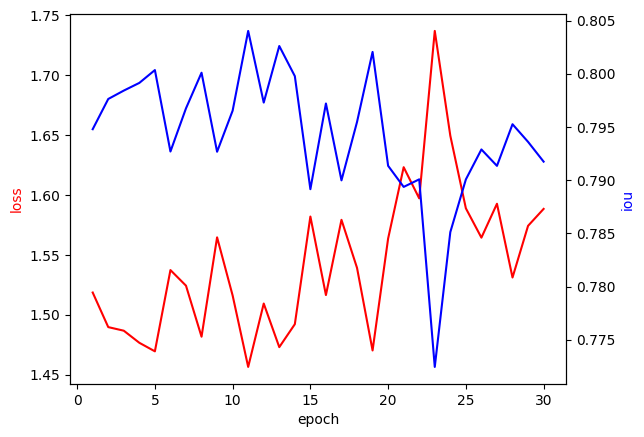

In [211]:
# loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_RMT_CENTER00001/result.log'
# loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_RMT_CENTER_no_down/result.log'
# loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_RMT_mix_CENTER/result.log'
# loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_RMT_sigma_CENTER/result.log'


# loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_OS_sigma_CENTER/result.log'


# loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_OS_sigma_RGBT/result.log'
# loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_OS_sigma_RGBT/result_0726.log'
# loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_OS_sigma_RGBT/result_0725sota.log'

loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_OS_sigma_RGBD/result.log'
# loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_OS_sigma_RGBD/result_0726.log'
# loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_OS_sigma_RGBD/result_0725sota.log'

# loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_OS_sigma_RGBE/result.log'
# loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_OS_sigma_RGBE/result_0726.log'
# loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_OS_sigma_RGBE/result_0725sota.log'
# loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_OS_sigma_RGBE/result_2path_4score.log'
# loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_OS_sigma_RGBE/result_3path_4score_no_norm.log'
# loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_plScore_OS_sigma_RGBE/result_3path_4score_modal_norm.log'

mode = 1  # 0: train, 1: val
start_epoch = 0
end_epoch = 0
info = read_loss_file(loss_file_path, mode='train' if mode == 0 else 'val')
# 画图
loss_list = []
iou_list = []

max_iou = 0
best_epoch = 0

for epoch, loss_iou in info.items():
    num = 0
    loss_sum = 0
    iou_sum = 0
    for loss, iou in loss_iou:
        num += 1
        loss_sum += loss
        iou_sum += iou
    avg_loss = loss_sum / num
    avg_iou = iou_sum / num
    if avg_iou > max_iou:
        max_iou = avg_iou
        best_epoch = epoch
    loss_list.append(loss_sum / num)
    iou_list.append(iou_sum / num)
end_epoch = len(loss_list) if end_epoch == 0 else end_epoch
loss_list, iou_list = loss_list[start_epoch:end_epoch], iou_list[start_epoch:end_epoch]

print("iou_list: ", iou_list)

print(f"best epoch: {best_epoch}, max iou: {max_iou}")

# 放大画布
# 分两个画布绘制
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(range(start_epoch + 1, end_epoch + 1), loss_list, 'r-')
ax2.plot(range(start_epoch + 1, end_epoch + 1), iou_list, 'b-')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss', color='r')
ax2.set_ylabel('iou', color='b')
plt.show()
